

### **Purpose -  A Comprehensive Analysis Using Exploratory Data Analysis and Binomial Logistic Regression.**



**Part 1:** EDA & Checking Model Assumptions

**Part 2:** Model Building and Evaluation

**Part 3:** Interpreting Model Results

### **Imports and Data Loading**

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,accuracy_score,precision_score,recall_score,\
confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression




In [2]:
df = pd.read_csv('waze_dataset.csv')

### **Analyze data using EDA techniques**

In [3]:
df.shape

(14999, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

Label column is missing 700 values.

In [6]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [7]:
df = df.drop('ID', axis = 1)

Evaluating the class imbalance in the target variable

In [8]:
df['label'].value_counts(normalize = True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [9]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Examination of the quartile values, standard deviations, and maximum values revealed the presence of outliers in several variables: sessions, drives, total_sessions, total_navigations_fav1, total_navigations_fav2, driven_km_drives, and duration_minutes_drives. These variables exhibit maximum values that significantly exceed the 75th percentile, which suggests the presence of outliers.

#### Crafting meaningful features is essential for addressing the business scenario or problem at hand.

1. An association exists between the churn rate and the average distance driven per driving day during the past month. Engineering a feature that encapsulates this information could prove beneficial.

In [10]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

C:\Users\Eashwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

There are some unusual values: an infinite mean, an undefined standard deviation (NaN), and an infinite maximum value. This peculiar behavior can be attributed to the presence of zero values within the driving_days data.


In [11]:
df.loc[df['km_per_driving_day'] == np.inf ,'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

2. To distinguish professional drivers from other users, a new binary feature named 'professional_driver' will be introduced. This feature will be assigned a value of 1 for users who had at least 60 drives and drove on 15 or more days during the past month.

In [12]:
df['professional_driver'] = np.where((df['drives'] >=60) & (df['driving_days'] >= 15),1,0)

In [13]:
df['professional_driver'].value_counts()

professional_driver
0    12405
1     2594
Name: count, dtype: int64

In [14]:
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

A significant disparity exists in churn rates between professional drivers and non-professional drivers, with professional drivers exhibiting a churn rate of 7.6% compared to 19.9% for non-professional drivers. This suggests that incorporating the 'professional_driver' feature into the model could enhance its predictive capabilities.    

### **Model Construction**

#### 1. Handling Missing Values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

In [16]:
df = df.dropna(subset=['label'])

#### 2. Impute outliers

While discarding outliers is generally discouraged, imputing outlying values is sometimes necessary. For this analysis, the 95th percentile of each column will be calculated, and any value in the column exceeding this threshold will be replaced with the 95th percentile value.

In [17]:
#def outlier_imputer(column_name, percentile):
  
 #   threshold = df[column_name].quantile(percentile)
  #  df.loc[df[column_name] > threshold, column_name] = threshold
   # print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [18]:
#for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
  #             'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
  #  outlier_imputer(column, 0.95)

In [19]:
 for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

In [20]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### 3. Encode categorical variables

In [21]:
#df1 = pd.get_dummies(df)

In [22]:
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [23]:
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

#df.loc[df['label'] == 'churned', 'label2'] = 1
#df.loc[df['label'] != 'churned', 'label2'] = 0


,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [24]:
df = df.drop('label', axis =1)

In [25]:
df = df.drop('device',axis =1)

#### 4. Essential assumptions for logistic regression

Independent Observations: This assumption ensures that the data points are not influenced by other data points in the dataset. For this project, it is reasonable to assume that the observations are independent.

Absence of Extreme Outliers: Outliers can significantly impact the model's performance. As outliers have already been addressed, this assumption is satisfied.

Minimal Multicollinearity: Multicollinearity occurs when independent variables are highly correlated, potentially leading to unstable model coefficients. The extent of multicollinearity will be assessed after modeling.

Linear Relationship between Independent Variables and Logit of the Dependent Variable: This assumption implies that the log-odds of the dependent variable change linearly with changes in the independent variables. The validity of this assumption will be evaluated after model development.

It is important to note that violating these assumptions may not always lead to a failed model. The impact of assumption violations depends on the specific context and the severity of the violation. Nevertheless, understanding and considering these assumptions is crucial for ensuring the reliability and interpretability of logistic regression models.

#### 5. Collinearity

Assessing the relationships between predictor variables

In [26]:
df.corr(method='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,device2,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.012704,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.011684,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.012138,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.011299,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,-0.001316,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,-0.000275,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,-0.002091,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,-0.007709,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.010221,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.003859,-0.294259


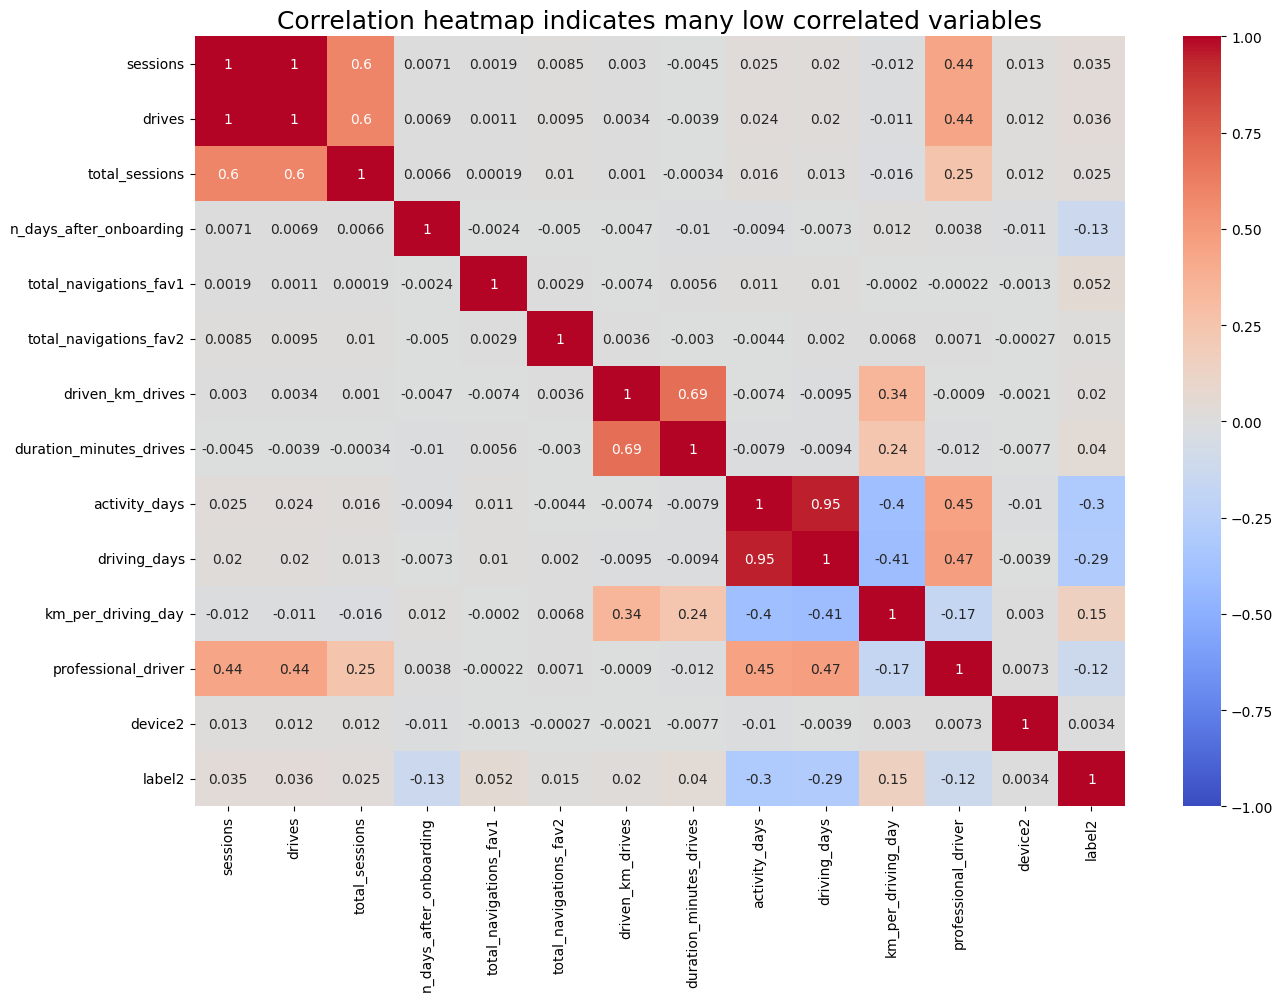

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

Certain predictor variables exhibit strong multicollinearity, as evidenced by Pearson correlation coefficients exceeding an absolute value of 0.7. Specifically, the correlation between 'sessions' and 'drives' is 1.0, and the correlation between 'driving_days' and 'activity_days' is 0.95. Due to this high degree of multicollinearity, only one of these variables should be included in the model.

#### 6. Model building

In [28]:
X = df.drop(columns = ['label2', 'sessions', 'driving_days'])

In [29]:
y = df['label2']

Given the imbalanced nature of the target class (82% retained vs. 18% churned), it is crucial to prevent an uneven split that could either underrepresent or overrepresent the minority class (churned users). To ensure that the minority class is adequately represented in both the training and testing sets, the 'stratify' parameter of the splitting function should be set to 'y'. This will guarantee that the proportion of churned users in both sets matches that of the original dataset."

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [31]:
model = LogisticRegression(penalty=None, max_iter=400)

model.fit(X_train, y_train)

LogisticRegression(max_iter=400, penalty=None)

To retrieve the coefficients for each variable, access the '.coef_' attribute of the trained model. The order of the coefficients corresponds to the sequence in which the variables appear in the dataset. Keep in mind that these coefficients represent the change in the log odds of the target variable for every one-unit increase in the corresponding predictor variable.

In [32]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001913
total_sessions             0.000327
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106032
km_per_driving_day         0.000018
professional_driver       -0.001529
device2                   -0.001041
dtype: float64

In [33]:
model.intercept_

array([-0.00170675])

To validate the assumption of linearity between the independent variables (X) and the estimated log odds (logits), createating a regression plot. Invoking the model's 'predict_proba()' method to obtain the probability of the target event for each sample in the training dataset. Storing the resulting 2-D array, where each row represents a user in X_train, in a variable named 'training_probabilities'. The first column represents the probability of a user not churning, while the second column represents the probability of a user churning.

In [34]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93963485, 0.06036515],
       [0.61967302, 0.38032698],
       [0.76463179, 0.23536821],
       ...,
       [0.9190964 , 0.0809036 ],
       [0.85092114, 0.14907886],
       [0.93516292, 0.06483708]])

Unlike traditional linear regression, logistic regression does not require a linear relationship between the predictor variable (X) and the dependent variable (y). However, the relationship between the log-odds (also known as logits) of y and X must be linear. This relationship is expressed by the formula: $$
logit(p) = ln(\frac{p}{1-p})
$$, where p represents the probability of the event of interest.

In [35]:
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

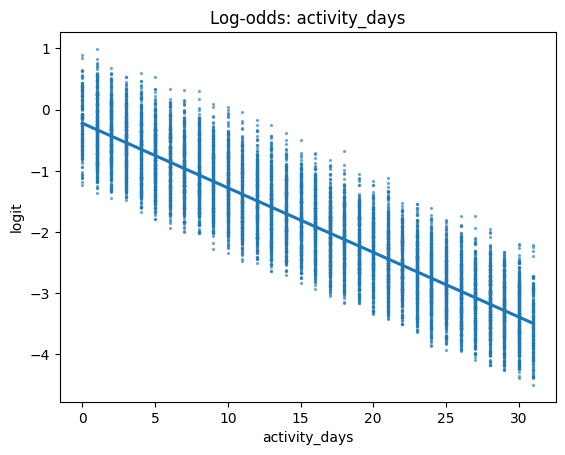

In [36]:
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

For a comprehensive analysis, this plot would be generated for each continuous or discrete predictor variable. For illustrative purposes, we only showcase the plot for 'activity_days'.

### **Results and evaluation**

In [37]:
y_preds = model.predict(X_test)

In [38]:
model.score(X_test, y_test)

0.8237762237762237

In [39]:
cm = confusion_matrix(y_test, y_preds)

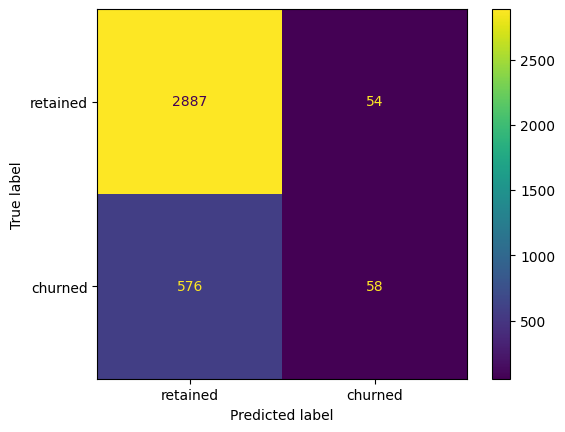

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [41]:
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



Precision: Precision is the proportion of positive predictions that are actually correct. In this case, 83% of the predictions that the model classified as "retained" were actually retained. However, only 52% of the predictions that the model classified as "churned" were actually churned.

Recall: Recall is the proportion of actual positives that are correctly identified as such. In this case, 98% of the actual retained customers were correctly identified by the model. However, only 9% of the actual churned customers were correctly identified by the model.

F1-score: The F1-score is a harmonic mean of precision and recall. It is a good measure of overall performance when both precision and recall are important. In this case, the F1-score for retained customers is 0.90, and the F1-score for churned customers is 0.16. This indicates that the model is much better at correctly identifying retained customers than churned customers.

Support: Support is the number of actual instances for each class. In this case, there are 2941 retained customers and 634 churned customers.

Accuracy: Accuracy is the proportion of all predictions that are correct. In this case, 82% of the predictions made by the model were correct.

The model's precision is subpar, and its recall is very low. This indicates that it frequently generates false negative predictions and misses identifying users who will churn.

#### A graphic representation of the coefficients of the model, demonstrating the relative importance of each feature.

In [42]:
feature_importance = list(zip(X_train.columns, model.coef_[0]))

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.001913368073195392),
 ('total_navigations_fav1', 0.0012317544298799394),
 ('total_navigations_fav2', 0.0009314781122164973),
 ('total_sessions', 0.00032707253637595307),
 ('duration_minutes_drives', 0.00010909348759954026),
 ('km_per_driving_day', 1.822316775293312e-05),
 ('driven_km_drives', -1.4860529192266098e-05),
 ('n_days_after_onboarding', -0.00040647767355943336),
 ('device2', -0.0010412174017488042),
 ('professional_driver', -0.0015285039878455916),
 ('activity_days', -0.10603195315725682)]

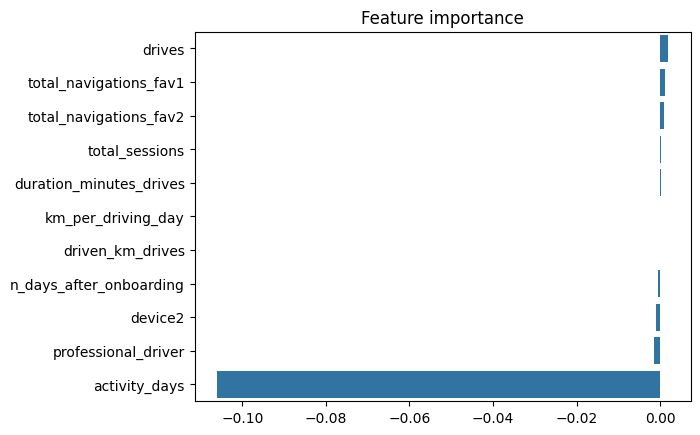

In [43]:
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### **Overall interpretation:**

The classification report shows that the model is reasonably good at classifying retained customers, with a precision of 0.83, a recall of 0.98, and an F1-score of 0.90. However, the model is not very good at classifying churned customers, with a precision of 0.52, a recall of 0.09, and an F1-score of 0.16. This suggests that the model may be overfitting to the retained customers in the training data.

Overall, the model has an accuracy of 0.82, which is a good indication of performance. However, it is important to note that the accuracy is not always a reliable measure of performance, especially when there is a large imbalance between the classes. In this case, there are many more retained customers than churned customers, so even a small number of false positives can have a large impact on the accuracy.

A better measure of performance in this case is the F1-score, which takes into account both precision and recall. The weighted average F1-score of 0.77 suggests that the model is doing a reasonable job of classifying both retained and churned customers.

The 'activity_days' feature exhibited the most significant impact on the model's predictions. It demonstrated a negative correlation with user churn, implying that users with higher activity levels were less likely to churn. This observation aligns with the strong correlation between 'activity_days' and 'driving_days', as identified during the exploratory data analysis (EDA), which indicated that users with more driving days were less likely to churn.

As observed in the previous exploratory data analysis (EDA), the churn rate increased with rising values of 'km_per_driving_day'. The correlation heatmap in this notebook further confirmed this positive correlation, indicating that 'km_per_driving_day' exhibited the strongest positive association with churn among all predictor variables and by a significant margin. However, in the model, this variable held the second-least importance.In a multiple logistic regression model, features can interact with each other, giving rise to relationships that may appear counterintuitive. This interplay between features is both an advantage and a disadvantage of predictive models. While capturing these interactions typically enhances the model's predictive power, it also increases the model's complexity and makes it more challenging to interpret.

The suitability of using this model for making significant business decisions is questionable due to its low recall score, indicating its inability to accurately identify users who will churn. However, if the model is solely employed to guide further exploratory research, it can still provide valuable insights

Recommendations:

Incorporating new features based on domain expertise can potentially enhance the predictive power of the model. This is evident in the current model, where the domain-driven feature 'professional_driver' emerged as the third most influential predictor. Additionally, scaling the predictor variables and experimenting with different combinations of predictors can help reduce noise from irrelevant features and improve the overall predictive performance.

The model could also be improved by collecting more data on churned customers. This would help the model to learn the characteristics of churned customers better and make more accurate predictions.

